In [16]:
!pip install minisom

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from minisom import MiniSom
import matplotlib.pyplot as plt

In [18]:
# Load the dataset (adjust the file path as needed)
data = pd.read_csv('/kaggle/input/fin-data/financial_anomaly_data.csv')

In [19]:
# Drop unnecessary columns
# We'll use 'Amount', 'TransactionType', and 'Location' for anomaly detection
X = data[['Amount', 'TransactionType', 'Location']]

# Convert categorical columns into numeric values using LabelEncoder
le_transaction_type = LabelEncoder()
le_location = LabelEncoder()

X['TransactionType'] = le_transaction_type.fit_transform(X['TransactionType'])
X['Location'] = le_location.fit_transform(X['Location'])

/tmp/ipykernel_30/2670741021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TransactionType'] = le_transaction_type.fit_transform(X['TransactionType'])
/tmp/ipykernel_30/2670741021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = le_location.fit_transform(X['Location'])


In [20]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Initialize the SOM with a grid size (10x10) and number of input features (3)
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

In [22]:
# Randomly initialize the weights of the SOM
som.random_weights_init(X_scaled)

In [23]:
# Train the SOM with 100 iterations
som.train_random(X_scaled, 100)

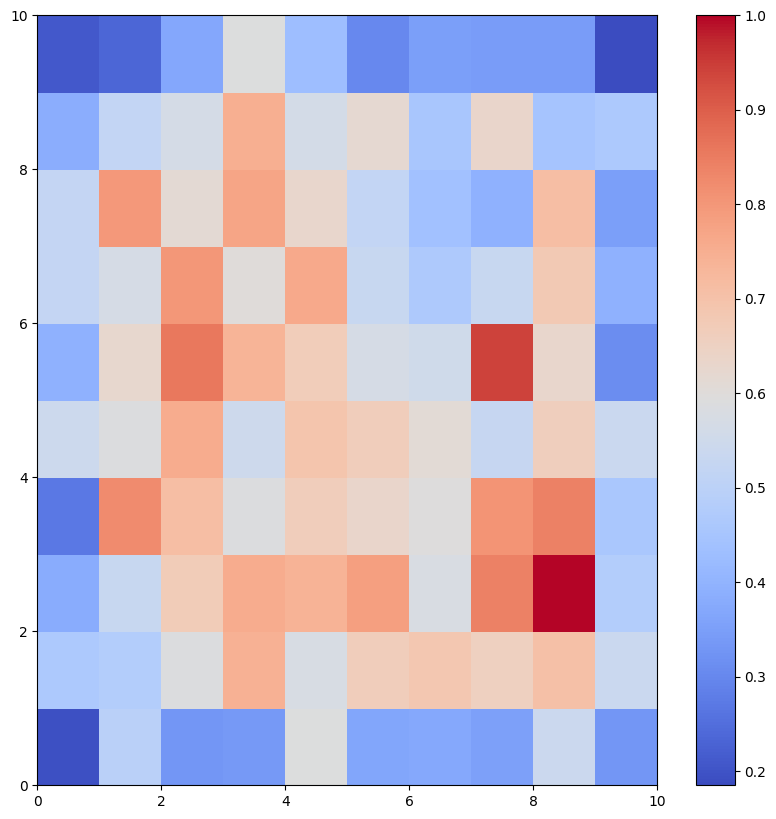

In [24]:
# Visualize the distance map (anomalies are likely in areas with high distances)
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # The distance map as a heatmap
plt.colorbar()

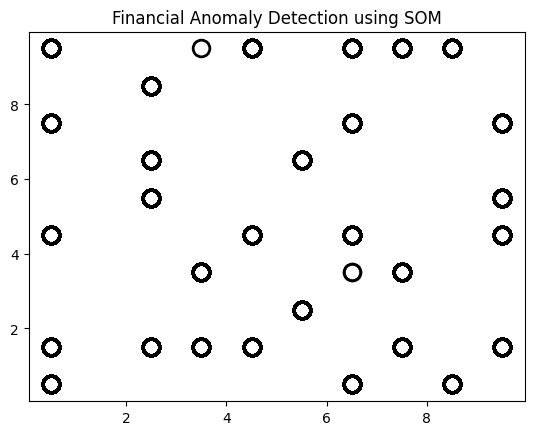

In [25]:
# Add markers for each transaction to the distance map
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Get the winning node for the transaction
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='k', markersize=12, markeredgewidth=2)

plt.title('Financial Anomaly Detection using SOM')
plt.show()

In [26]:
# Get the winning nodes for each transaction
winners = np.array([som.winner(x) for x in X_scaled])

In [29]:
# Get the winning nodes for each transaction
winners = np.array([som.winner(x) for x in X_scaled])

# Print winning nodes
print("Winning Nodes for each transaction:")
print(winners)

# Set a threshold for anomaly detection based on SOM distance map
threshold = np.mean(som.distance_map()) + np.std(som.distance_map())

# Classify each transaction as normal (0) or anomaly (1) based on the threshold
anomalies = np.zeros(len(X_scaled), dtype=int)
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    distance = som.distance_map()[w]
    if distance > threshold:
        anomalies[i] = 1

Winning Nodes for each transaction:
[[9 1]
 [3 1]
 [9 4]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [30]:
# Print detected anomalies
print("\nAnomalies detected (0 = normal, 1 = anomaly):")
print(anomalies)

# Print the attributes of the file (data types and basic statistics)
print("\nFile Attributes:")
print(data.info())
print("\nDescriptive Statistics of Numerical Columns:")
print(data.describe())


Anomalies detected (0 = normal, 1 = anomaly):
[0 1 0 ... 0 0 0]

File Attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB
None

Descriptive Statistics of Numerical Columns:
              Amount
count  216960.000000
mean    50090.025108
std     29097.905016
min        10.510000
25%     25061.242500
50%     50183.980000
75%     75080.460000
max    978942.260000
